In [2]:
import pandas as pd
df = pd.read_csv('../../Datos/unbalanced_df.csv').drop(['time'],axis=1)
df_features = df
df_features.head()

,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),...,anio,trimestre,dia_del_mes,dia_del_anio,es_fin_de_semana,es_festivo_mexico,dia_partido,es_dia_laborable,estacion,count
0,3,25.6,15.8,20.3,26.5,16.0,20.9,0.0,0.0,0.0,...,2017,1,1,1,1,1,0,0,4,46
1,0,27.4,12.4,19.9,26.8,10.8,19.2,0.0,0.0,0.0,...,2017,1,2,2,0,0,0,1,4,52
2,1,25.7,16.0,20.5,26.2,14.7,20.2,0.0,0.0,0.0,...,2017,1,3,3,0,0,0,1,4,76
3,51,19.2,13.4,16.7,19.8,13.4,16.9,1.2,1.2,0.0,...,2017,1,4,4,0,0,0,1,4,73
4,2,24.6,12.5,17.9,25.2,11.7,18.1,0.0,0.0,0.0,...,2017,1,5,5,0,0,0,1,4,65


In [3]:
# Preparar la matriz de características (X) y el vector objetivo (Y)
# En X, eliminamos las columnas 'time' y 'count' que no son características
X = df_features.drop(['count'], axis=1)

# En Y, seleccionamos la columna 'count' como nuestro vector objetivo
Y = df_features['count']


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np
import time
import pandas as pd

# Divide tus datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Inicializa diferentes modelos de regresión
models = {
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
    'K-NN': KNeighborsRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Neural Network (ANN)': MLPRegressor()
}

# Entrena y evalúa cada modelo
results = {}
for model_name, model in models.items():
    start_time = time.time()
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    msle = mean_squared_log_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        'MAE': mae,
        'MAPE': mape,
        'MSE': mse,
        'RMSE': rmse,
        'MSLE': msle,
        'R-squared': r2,
        'Elapsed Time (s)': elapsed_time
    }

# Crea una tabla de resultados
results_df = pd.DataFrame.from_dict(results, orient='index')


# Muestra la tabla de resultados
results_df.sort_values(by='R-squared', ascending=False)


c:\Users\fer_m\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,MAE,MAPE,MSE,RMSE,MSLE,R-squared,Elapsed Time (s)
Gradient Boosting,9.938122,14.962573,165.423741,12.861716,0.033875,0.663207,0.780124
Random Forest,10.020602,15.050117,171.078517,13.079699,0.035344,0.651694,4.458031
Linear Regression,12.707193,19.225412,261.041744,16.156786,0.052510,0.468535,0.026590
AdaBoost,12.581915,19.747294,262.293024,16.195463,0.054344,0.465987,0.246027
Neural Network (ANN),16.311628,26.248540,397.336730,19.933307,0.083536,0.191046,0.982133
SVR,18.246528,30.175778,496.744296,22.287761,0.107033,-0.011342,0.183313
K-NN,18.973611,30.244063,570.823426,23.891911,0.115967,-0.162162,0.181718


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np
import time
import pandas as pd

# Divide tus datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Inicializa diferentes modelos de regresión
models = {
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
    'K-NN': KNeighborsRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Neural Network (ANN)': MLPRegressor()
}

# Define diferentes tamaños de conjunto de prueba para probar
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

# Número de iteraciones por tamaño de prueba
num_iterations = 100
# Almacena los resultados de todas las iteraciones en un solo DataFrame
all_results = []

for test_size in test_sizes:

    # Divide los datos en entrenamiento y prueba con el nuevo tamaño de prueba fuera del bucle de modelos
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)

    for iteration in range(num_iterations):
        results = {}
        for model_name, model in models.items():
            start_time = time.time()

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            end_time = time.time()
            elapsed_time = end_time - start_time

            mae = mean_absolute_error(y_test, y_pred)
            mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
            mse = mean_squared_error(y_test, y_pred)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            msle = mean_squared_log_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            results[model_name] = {
                'MAE': mae,
                'MAPE': mape,
                'MSE': mse,
                'RMSE': rmse,
                'MSLE': msle,
                'R-squared': r2,
                'Elapsed Time (s)': elapsed_time
            }

        all_results.append(results)

    

# Crear un DataFrame único con los resultados acumulados
results_df = pd.concat([pd.DataFrame.from_dict(iteration_results, orient='index') for iteration_results in all_results], keys=test_sizes, names=['Test Size','Modelo'])
#results_df.columns = ['Test Size', 'Modelo', 'MAE','MAPE','RMSE','R-squared','Elapsed Time (s)']

# Mostrar el DataFrame completo
results_df.sort_values(by=('R-squared'), ascending=False).head(20)


c:\Users\fer_m\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fer_m\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fer_m\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fer_m\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [23]:
results_df.reset_index(inplace=True)

In [27]:
import pandas as pd

# Set the display option to truncate floats to 2 decimal places
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

# Sort the DataFrame by 'R-squared' column in descending order and display the top 10 rows
truncated_results = results_df[['MAPE','Test Size','Modelo','R-squared','MAE','MSE','RMSE','MSLE','Elapsed Time (s)']].sort_values(by='R-squared', ascending=False).head(10)
truncated_results


,MAPE,Test Size,Modelo,R-squared,MAE,MSE,RMSE,MSLE,Elapsed Time (s)
19,16.11,0.30,Gradient Boosting,0.71,9.66,160.89,12.68,0.04,0.10
5,16.11,0.10,Gradient Boosting,0.71,9.66,160.89,12.68,0.04,0.10
12,16.08,0.20,Gradient Boosting,0.71,9.65,160.91,12.69,0.04,0.10
26,16.10,0.40,Gradient Boosting,0.71,9.65,160.96,12.69,0.04,0.10
33,16.10,0.50,Gradient Boosting,0.71,9.66,161.73,12.72,0.04,0.10
21,17.85,0.40,Random Forest,0.65,10.80,194.61,13.95,0.05,0.57
0,17.79,0.10,Random Forest,0.65,10.88,195.76,13.99,0.05,0.64
7,17.92,0.20,Random Forest,0.64,10.93,198.47,14.09,0.05,0.58
14,18.01,0.30,Random Forest,0.64,10.98,202.15,14.22,0.05,0.59
28,18.01,0.50,Random Forest,0.64,11.04,202.99,14.25,0.05,0.58


C:\Users\fer_m\AppData\Local\Temp\ipykernel_18476\1048149198.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Modelo', y='MAPE', data=df_plot, inner='quartile', ax=ax1, palette='viridis')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


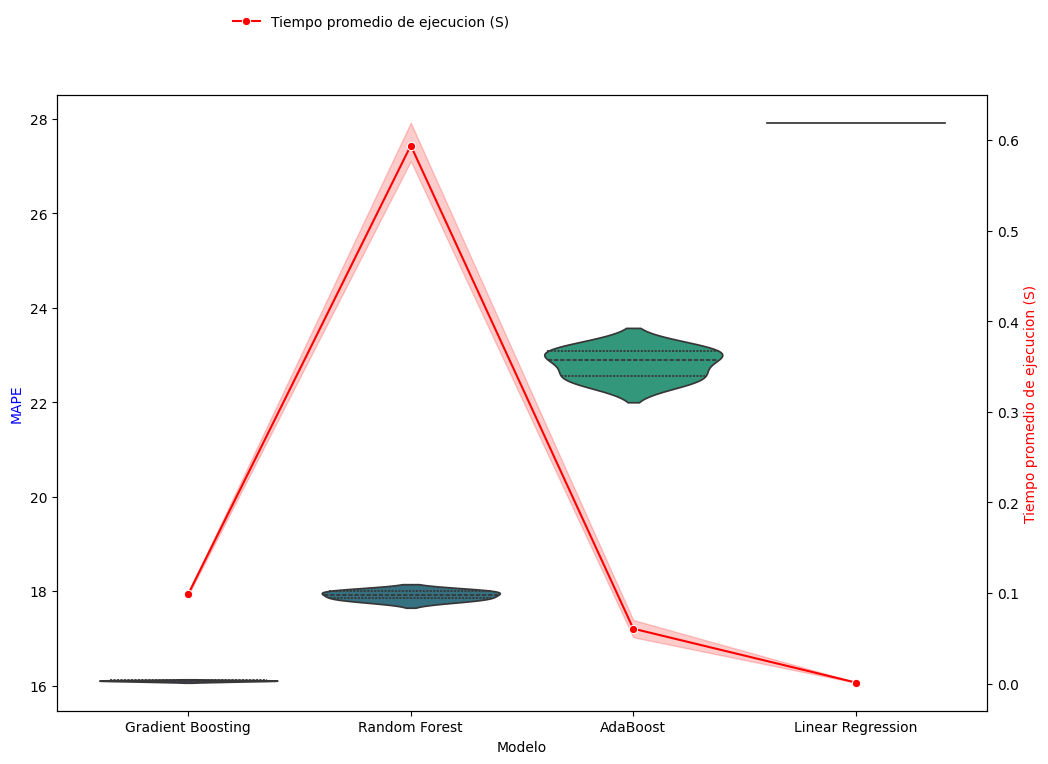

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra los 20 mejores resultados según el valor de R-squared
top_results = results_df.sort_values(by='R-squared', ascending=False).head(20)

# Reorganiza el DataFrame para facilitar la visualización
df_plot = top_results.reset_index()

# Crea el violin plot
fig, ax1 = plt.subplots(figsize=(12, 8))
sns.violinplot(x='Modelo', y='MAPE', data=df_plot, inner='quartile', ax=ax1, palette='viridis')

# Ajusta el límite del eje y para MAPE
#ax1.set_ylim(20, 30)

# Añade un segundo eje y para el tiempo de ejecución
ax2 = ax1.twinx()
sns.lineplot(x='Modelo', y='Elapsed Time (s)', data=df_plot, ax=ax2, color='red', marker='o', label='Tiempo promedio de ejecucion (S)')

# Ajusta las leyendas y etiquetas
ax1.set_ylabel('MAPE', color='blue')
ax2.set_ylabel('Tiempo promedio de ejecucion (S)', color='red')

# Posiciona la leyenda en la parte superior
ax1.legend(loc='upper left', bbox_to_anchor=(0.5, 1.15), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(0.5, 1.15), frameon=False)

plt.show()


C:\Users\fer_m\AppData\Local\Temp\ipykernel_18476\3252220770.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Modelo', y='MAPE', data=df_plot, inner='quartile', ax=ax1, palette='viridis')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


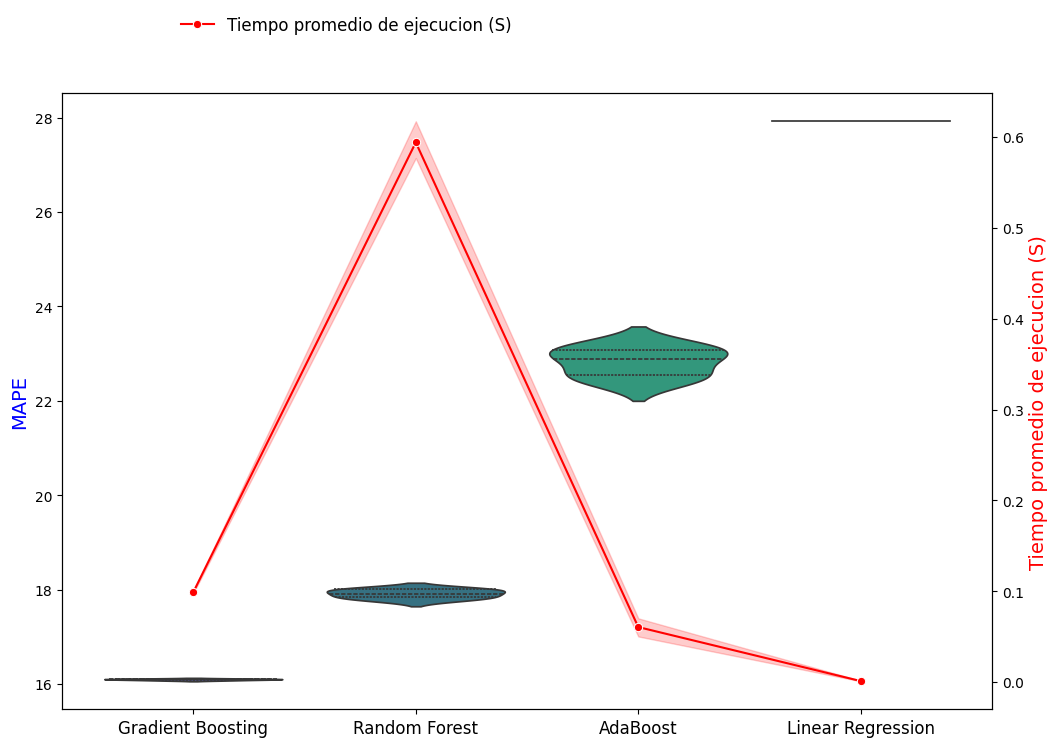

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra los 20 mejores resultados según el valor de R-squared
top_results = results_df.sort_values(by='R-squared', ascending=False).head(20)

# Reorganiza el DataFrame para facilitar la visualización
df_plot = top_results.reset_index()

# Crea el violin plot
fig, ax1 = plt.subplots(figsize=(12, 8))
sns.violinplot(x='Modelo', y='MAPE', data=df_plot, inner='quartile', ax=ax1, palette='viridis')

# Ajusta el límite del eje y para MAPE
#ax1.set_ylim(20, 30)

# Añade un segundo eje y para el tiempo de ejecución
ax2 = ax1.twinx()
sns.lineplot(x='Modelo', y='Elapsed Time (s)', data=df_plot, ax=ax2, color='red', marker='o', label='Tiempo promedio de ejecucion (S)')

# Ajusta el tamaño de la fuente de los labels en los ejes y las leyendas
ax1.set_ylabel('MAPE', color='blue', fontsize=14)
ax2.set_ylabel('Tiempo promedio de ejecucion (S)', color='red', fontsize=14)

# Ajusta el tamaño de la fuente de las leyendas
ax1.legend(loc='upper left', bbox_to_anchor=(0.5, 1.15), frameon=False, fontsize=12)
ax2.legend(loc='upper right', bbox_to_anchor=(0.5, 1.15), frameon=False, fontsize=12)

# Cambia el tamaño de los labels del eje x
ax1.tick_params(axis='x', labelsize=12)

# Elimina el título del eje x
ax1.set_xlabel('')
plt.show()


Tras exhaustivas pruebas que involucraron la evaluación de diversos modelos con variaciones en los conjuntos de prueba y entrenamiento, cada uno ejecutado en 100 iteraciones para garantizar la robustez de los resultados, se observó una clara tendencia. Al analizar el Mean Absolute Percentage Error (MAPE) y el tiempo promedio de ejecución, se destacó el rendimiento superior del modelo de Gradient Boosting. Este resultado sugiere su idoneidad para abordar nuestro problema, mostrando consistencia y precisión en la predicción con tiempos de procesamiento eficientes.